[Reference](https://github.com/aishahismail3/Coding-test-EDA/blob/main/Aishah_DaiichiAssessment2.ipynb)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
from scipy import stats
df_charges = pd.read_csv('https://raw.githubusercontent.com/aishahismail3/Coding-test-EDA/main/charges.csv')
df_personal = pd.read_csv('https://raw.githubusercontent.com/aishahismail3/Coding-test-EDA/main/personal.csv')
df_plan = pd.read_csv('https://raw.githubusercontent.com/aishahismail3/Coding-test-EDA/main/plan.csv')

print('charges', df_charges.shape)
print('personal', df_personal.shape)
print('plan', df_plan.shape)

charges (7032, 8)
personal (5283, 5)
plan (3540, 10)


In [3]:
df_charges.head(3)

,customerID,tenure,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
df_personal.head(3)

,customerID,gender,partner,dependents,age
0,5575-GNVDE,Male,No,No,41
1,3668-QPYBK,Male,No,No,58
2,7795-CFOCW,Male,No,No,61


In [5]:
df_personal.head(3)

,customerID,gender,partner,dependents,age
0,5575-GNVDE,Male,No,No,41
1,3668-QPYBK,Male,No,No,58
2,7795-CFOCW,Male,No,No,61


In [6]:
df_charges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   tenure            7032 non-null   int64  
 2   contract          7032 non-null   object 
 3   paperlessBilling  7032 non-null   object 
 4   paymentMethod     7032 non-null   object 
 5   monthlyCharges    6577 non-null   float64
 6   totalCharges      6577 non-null   float64
 7   churn             7032 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 439.6+ KB


In [7]:
df_charges.isnull().sum()

customerID            0
tenure                0
contract              0
paperlessBilling      0
paymentMethod         0
monthlyCharges      455
totalCharges        455
churn                 0
dtype: int64

In [8]:
df_personal.isnull().sum()

customerID    0
gender        0
partner       0
dependents    0
age           0
dtype: int64

In [9]:
df_plan.isnull().sum()

customerID          0
phoneService        0
multipleLines       0
internetService     0
onlineSecurity      0
onlineBackup        0
deviceProtection    0
techSupport         0
streamingTV         0
streamingMovies     0
dtype: int64

In [10]:
df_charges['monthlyCharges'].describe()

count    6577.000000
mean       64.654637
std        30.101974
min        18.250000
25%        35.250000
50%        70.300000
75%        89.850000
max       118.750000
Name: monthlyCharges, dtype: float64

In [11]:
print(df_charges['monthlyCharges'].quantile(0.10))
print(df_charges['monthlyCharges'].quantile(0.90))

20.05
102.29000000000005


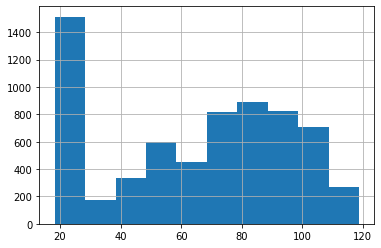

In [12]:
df_charges['monthlyCharges'].hist()

In [13]:
df_charges['monthlyCharges'] = np.where(df_charges['monthlyCharges']<20.0, 20.0,df_charges['monthlyCharges'])
df_charges['monthlyCharges'] = np.where(df_charges['monthlyCharges'] >102.0, 102.0,df_charges['monthlyCharges'])
df_charges['monthlyCharges'].describe()

count    6577.000000
mean       64.082408
std        29.177803
min        20.000000
25%        35.250000
50%        70.300000
75%        89.850000
max       102.000000
Name: monthlyCharges, dtype: float64

In [14]:
# TRIMMING
index = df_charges[(df_charges['monthlyCharges'] >= 102)|(df_charges['monthlyCharges'] <= 20)].index
df_charges.drop(index, inplace=True)
df_charges['monthlyCharges'].describe()

count    5293.000000
mean       64.442849
std        25.495045
min        20.050000
25%        45.350000
50%        70.150000
75%        85.350000
max       101.950000
Name: monthlyCharges, dtype: float64

In [15]:
trim_ave = round(df_charges['monthlyCharges'].sum() / 5293)
trim_ave

64

In [16]:
# fill null 
df_charges['monthlyCharges'].fillna((trim_ave), inplace=True)
df_charges['monthlyCharges'].describe()

count    5748.000000
mean       64.407794
std        24.465286
min        20.050000
25%        49.050000
50%        66.875000
75%        84.650000
max       101.950000
Name: monthlyCharges, dtype: float64

In [17]:
df_charges.isnull().sum()

customerID            0
tenure                0
contract              0
paperlessBilling      0
paymentMethod         0
monthlyCharges        0
totalCharges        455
churn                 0
dtype: int64

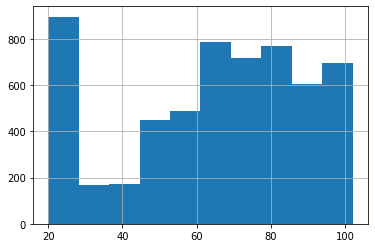

In [18]:
df_charges['monthlyCharges'].hist()

In [19]:
df_charges['totalCharges'].describe()

count    5293.000000
mean     2005.560042
std      1905.316448
min        20.050000
25%       401.300000
50%      1374.900000
75%      3233.600000
max      7459.050000
Name: totalCharges, dtype: float64

In [20]:
df_charges['totalCharges'].fillna((df_charges['monthlyCharges'])*((df_charges['tenure'])),
                                  inplace=True)
df_charges['totalCharges'].describe()

count    5748.000000
mean     2015.989788
std      1881.320335
min        20.050000
25%       412.400000
50%      1408.000000
75%      3285.362500
max      7459.050000
Name: totalCharges, dtype: float64

In [21]:
df_charges['tenureBinned'] = pd.cut(df_charges['tenure'], bins=[0, 24, 48, 60])
df_charges.head(3)

,customerID,tenure,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn,tenureBinned
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No,"(0, 24]"
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.50,No,"(24, 48]"
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,"(0, 24]"


In [22]:
df_charges['churn'].value_counts()


No     4105
Yes    1643
Name: churn, dtype: int64

No     4105
Yes    1643
Name: churn, dtype: int64


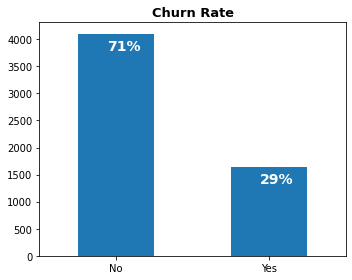

In [23]:
import matplotlib.pyplot as plt

print(df_charges.churn.value_counts())

fig, ax = plt.subplots(figsize=(5,4))
name = ["No", "Yes"]
ax = df_charges.churn.value_counts().plot(kind='bar')
ax.set_title("Churn Rate", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()-300, \
            str(round((i.get_height()/total)*100))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

In [24]:
print('charges', df_charges.shape)
print('personal', df_personal.shape)
print('plan', df_plan.shape)

charges (5748, 9)
personal (5283, 5)
plan (3540, 10)


In [25]:
merge1 = pd.merge(df_charges, df_personal, on='customerID')
merge2 = pd.merge(merge1, df_plan, on='customerID')
print('merge2', merge2.shape)

merge2 (2860, 22)


In [26]:
len(merge2['customerID'])

2860

In [27]:
p = merge2['age']
m=0
for x in p:
  if x>= 65:
    m = m+1
percentage = round((m / len(merge2['customerID']))*100)
print('Total cust above 65 yo:', m)
print('Percentage cust above 65 yo: ',percentage)

Total cust above 65 yo: 1026
Percentage cust above 65 yo:  36


In [28]:
# or another way of checking the len
result = merge2[merge2['age'].between(65,180)]
pct = round((len(result) / len(merge2['customerID']))*100)

print('Total cust above 65 yo:', len(result))
print('Percentage customer above 60 years old:', pct)

Total cust above 65 yo: 1026
Percentage customer above 60 years old: 36
